In [1]:
def get_metrics(input_file):
    print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics=[]
    split_title = input_file.split("_")
#     print(split_title)
    metrics.extend([float(split_title[5]), float(split_title[6])])    
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[0]][split_title[4]].append(metrics)

In [2]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(lambda: defaultdict(list))
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

input file:  stack19_ubbm3d_summary_1_4.5_0.67_1500_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_1.00_1500_half.txt
input file:  stack19_ubbm3d_summary_1_4.5_0_2000_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_0.67_0_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0.67_500_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0_1500_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0_2000_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_0.33_2000_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_1.00_1000_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_1.00_500_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_1.00_0_half.txt
input file:  stack19_ubbm3d_summary_1_4.0_0_2000_half.txt
input file:  stack19_ubbm3d_summary_1_4.5_1.00_500_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0.33_0_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0_500_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0.33_1500_half.txt
input file:  stack19_ubbm3d_summary_1_3.5_0.67_1500_

In [3]:
all_metrics

defaultdict(<function __main__.<lambda>()>,
            {'stack19': defaultdict(list,
                         {'4.5': [[0.67, 1500.0, 19544.91, 0.00929, 5.5],
                           [0.0, 2000.0, 19565.85, 0.00999, 5.4],
                           [1.0, 500.0, 19564.48, 0.00948, 5.5],
                           [0.67, 0.0, 19568.19, 0.009, 5.5],
                           [0.67, 1000.0, 19545.15, 0.00943, 5.4],
                           [0.33, 1000.0, 19543.91, 0.0094, 5.4],
                           [0.0, 1500.0, 19566.82, 0.00997, 5.4],
                           [0.0, 1000.0, 19567.84, 0.01003, 5.4],
                           [1.0, 1500.0, 19546.38, 0.00934, 5.5],
                           [0.33, 1500.0, 19543.4, 0.00924, 5.5],
                           [1.0, 0.0, 19568.99, 0.00899, 5.5],
                           [0.33, 2000.0, 19543.52, 0.00921, 5.6],
                           [0.67, 500.0, 19562.78, 0.00946, 5.4],
                           [0.0, 500.0, 19567.23, 0.00

getting interpolation type with stack19
getting interpolation stack 4.5
[0.0, 0.33, 0.67, 1.0]
[0.0, 500.0, 1000.0, 1500.0, 2000.0]
[[0.000000e+00 2.000000e+03 1.956585e+04 9.990000e-03 5.400000e+00]
 [0.000000e+00 1.500000e+03 1.956682e+04 9.970000e-03 5.400000e+00]
 [0.000000e+00 1.000000e+03 1.956784e+04 1.003000e-02 5.400000e+00]
 [0.000000e+00 5.000000e+02 1.956723e+04 9.950000e-03 5.400000e+00]
 [0.000000e+00 0.000000e+00 1.957155e+04 9.290000e-03 5.400000e+00]]
[[3.300000e-01 1.000000e+03 1.954391e+04 9.400000e-03 5.400000e+00]
 [3.300000e-01 1.500000e+03 1.954340e+04 9.240000e-03 5.500000e+00]
 [3.300000e-01 2.000000e+03 1.954352e+04 9.210000e-03 5.600000e+00]
 [3.300000e-01 0.000000e+00 1.956766e+04 9.000000e-03 5.500000e+00]
 [3.300000e-01 5.000000e+02 1.956086e+04 9.440000e-03 5.500000e+00]]
[[6.700000e-01 1.500000e+03 1.954491e+04 9.290000e-03 5.500000e+00]
 [6.700000e-01 0.000000e+00 1.956819e+04 9.000000e-03 5.500000e+00]
 [6.700000e-01 1.000000e+03 1.954515e+04 9.430000e

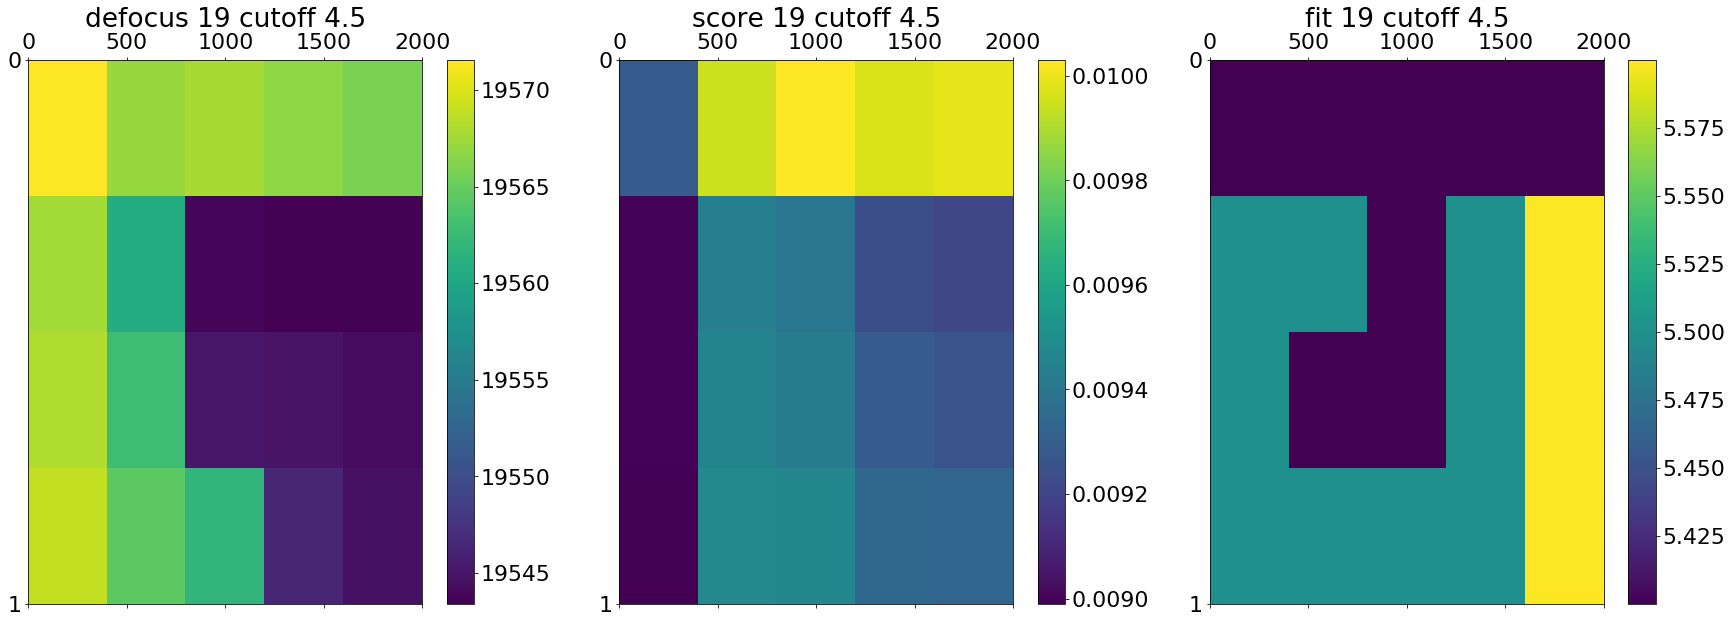

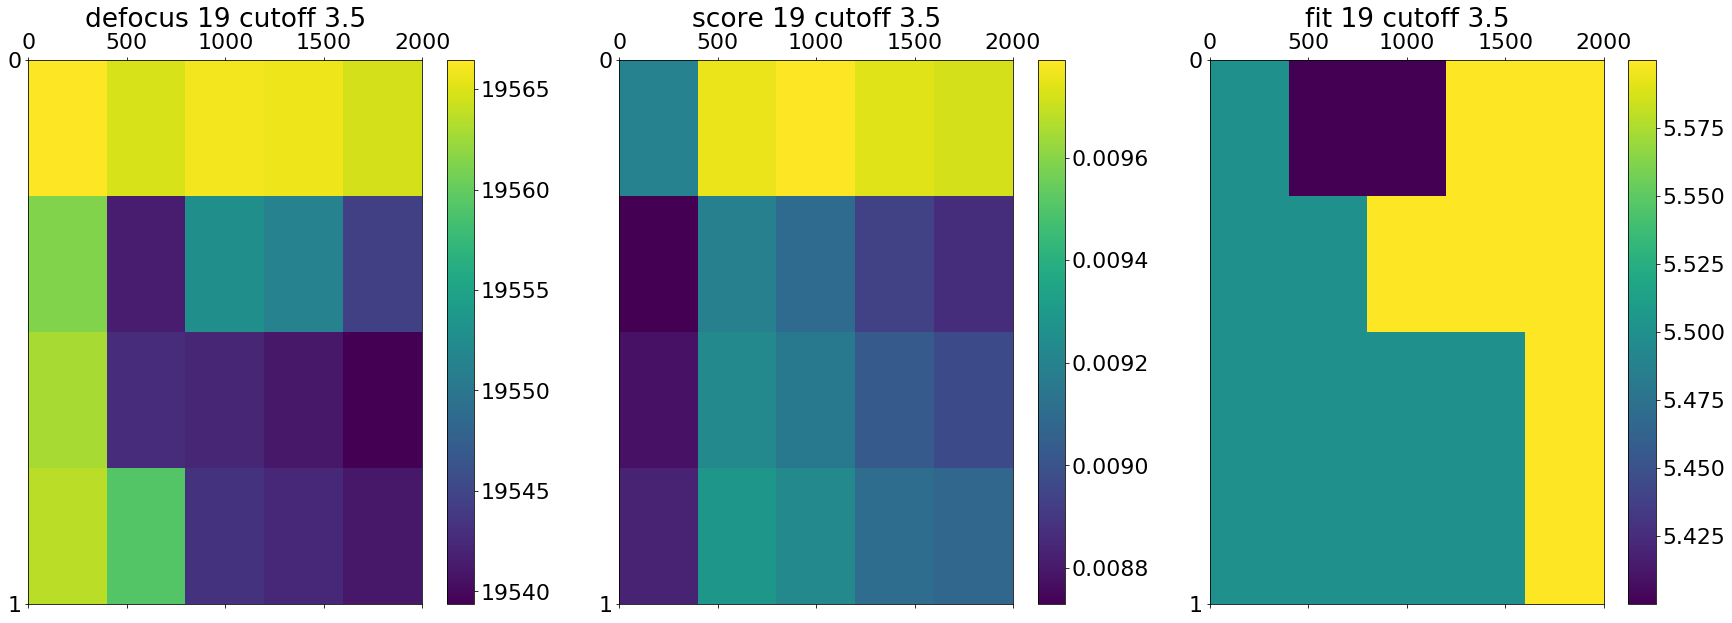

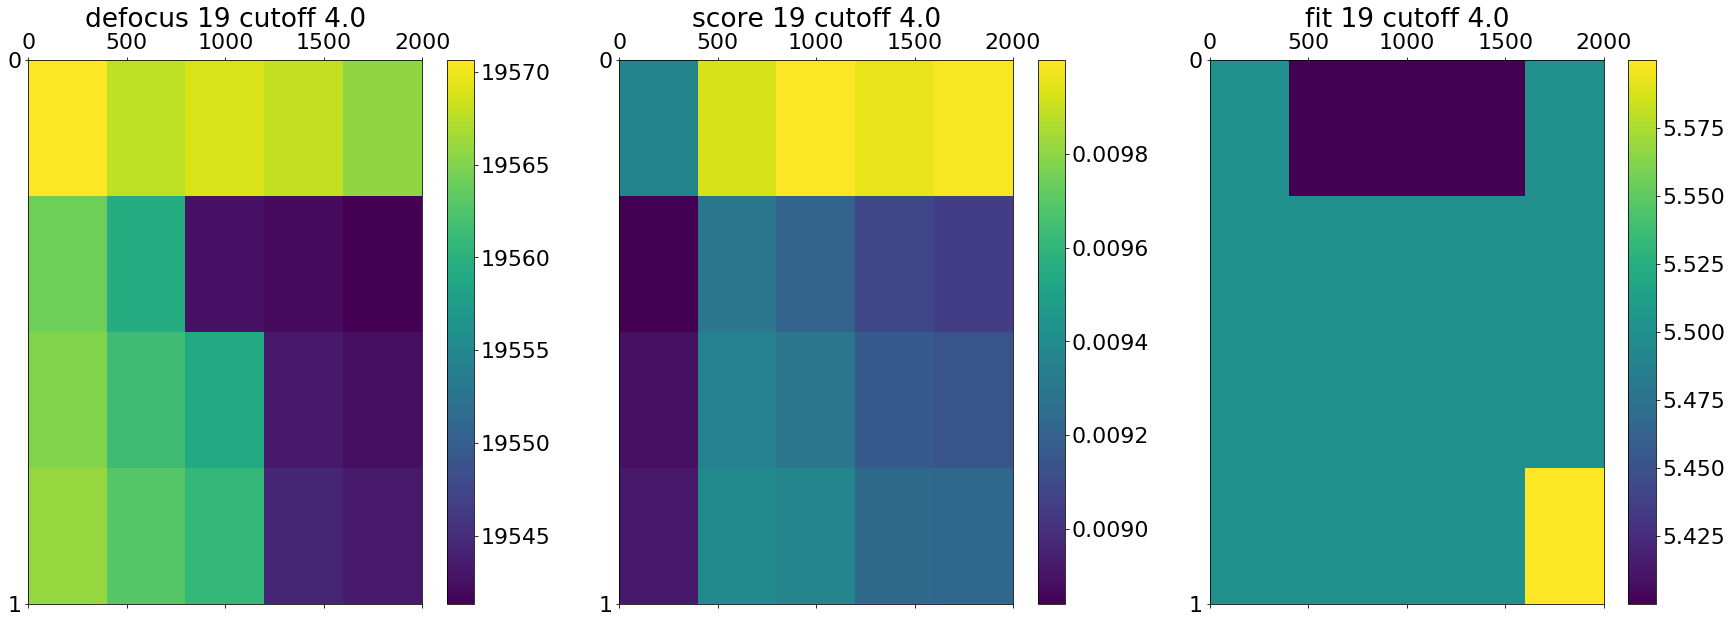

In [5]:
plt.rcParams.update({'font.size': 22})
j=1
for key in all_metrics.keys():
    print("getting interpolation type with", key)
    key_metrics = all_metrics[key]
#     print(key_metrics)
    for i,stack in enumerate(all_metrics[key].keys()):
        num = i+1
        print("getting interpolation stack", stack)

#         print("we are now at num", num)
#         print("key metrics")
#         print(key_metrics)
        stack_num = int(key.split('stack')[-1])
        curr_stack = key_metrics[stack]
        stack_metrics=np.array(curr_stack)
#         print("stack metrics")
#         print(stack_metrics)
        threshold_mul = sorted(set(stack_metrics.T[0]))
        print(threshold_mul)

        bfactors = sorted(set(stack_metrics.T[1]))
        print(bfactors)

        twoddefocus=[]
        twodscores=[]
        twodfit=[]
        scores=[]
        fit=[]
        for thres in threshold_mul:# all_metrics
            vals=np.array(list(filter(lambda x: x[0] == float(thres), stack_metrics)),dtype='float32')
            print(vals)
            order = vals[:,1].argsort()
        #     print(order)
        #     print(vals[order])
            twoddefocus.append(list(vals[order][:,2]))
            twodscores.append(list(vals[order][:,3]))
            twodfit.append(list(vals[order][:,4]))
            means=vals.mean(axis=0)
            scores.append(means[3])
            fit.append(means[4])
        #     print(vals[:,3])
        # print(twodscores)
        # print(twodfit)
        #     print(twodscores)
        extent = [min(bfactors), max(bfactors), max(threshold_mul), min(threshold_mul)]
        # all_metrics
        fig, axes = plt.subplots(1, 3,figsize=(30,10))
        #     fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

        # fig, ax = plt.subplots()
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes('right', size='5%', pad=0.05)

        mat = axes[0].matshow(twoddefocus,extent=extent,aspect='auto')
        axes[0].set_title('defocus {} cutoff {}'.format(stack_num, stack))
        fig.colorbar(mat,ax=axes[0])

        mat = axes[1].matshow(twodscores,extent=extent,aspect='auto')
        axes[1].set_title('score {} cutoff {}'.format(stack_num, stack))
        fig.colorbar(mat,ax=axes[1])

        mat = axes[2].matshow(twodfit,extent=extent,aspect='auto')
        axes[2].set_title('fit {} cutoff {}'.format(stack_num, stack))
        fig.colorbar(mat,ax=axes[2])